# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 13: Simple Linear Regression. Parametric bootstrap. Partial and part correlation.


[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

## 1. Simple Linear Regression

In [2]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - data
import numpy as np
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf


# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()
# - rng
rng = np.random.default_rng()
# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

In [3]:
# - loading the dataset
# - Kaggle: https://www.kaggle.com/datasets/aungpyaeap/fish-market
# - place it in your _data/ directory
fish_data = pd.read_csv(os.path.join(data_dir, 'Fish.csv'))
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [4]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Target: predict Weight from Height

In [5]:
model_frame = fish_data[['Height', 'Weight']]
model_frame

,Height,Weight
0,11.5200,242.0
1,12.4800,290.0
2,12.3778,340.0
3,12.7300,363.0
4,12.4440,430.0
...,...,...
154,2.0904,12.2
155,2.4300,13.4
156,2.2770,12.2
157,2.8728,19.7


In [6]:
# - fitting the linear model to the data
linear_model = smf.ols(formula='Weight ~ Height', data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.84e-27
Time:                        21:52:57   Log-Likelihood:                -1101.0
No. Observations:                 159   AIC:                             2206.
Df Residuals:                     157   BIC:                             2212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -144.3860     45.663     -3.162      0.002    -234.579     -54.193
Height        60.4964      4.595     13.164      0.000      51.419      69.573
==============================================================================
Omnibus:                       95.711   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.586
Skew:                           2.288   Prob(JB):                    1.61e-105
Kurtosis:                      10.204   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear model has the form

$$y = \beta_1 x + \beta_0 + \varepsilon,$$

where
- $y$ - the true value of the *target variable*
- $\beta_1$ - the *slope* of the model
- $\beta_0$ - the *intercept* of the model
- $\varepsilon$ - the *residual*

The predicted value $\hat{y}$ of the target variable is computed via Liner regression via

$$\hat{y} = \beta_1 x + \beta_0.$$

In [7]:
# - model's parameters; Hight represent the slope k
linear_model.params

Intercept   -144.385971
Height        60.496351
dtype: float64

In [8]:
# - predicting the value using model's formula and parameters
model_frame['Predicted Values'] = linear_model.predict()

In [9]:
# - calculating the residuals - the difference between the true and predicted values
model_frame['Residuals'] = linear_model.resid

In [10]:
model_frame

,Height,Weight,Predicted Values,Residuals
0,11.5200,242.0,552.531995,-310.531995
1,12.4800,290.0,610.608492,-320.608492
2,12.3778,340.0,604.425765,-264.425765
3,12.7300,363.0,625.732580,-262.732580
4,12.4440,430.0,608.430623,-178.430623
...,...,...,...,...
154,2.0904,12.2,-17.924399,30.124399
155,2.4300,13.4,2.620162,10.779838
156,2.2770,12.2,-6.635779,18.835779
157,2.8728,19.7,29.407947,-9.707947


In [11]:
# - some statistics on the residuals
model_frame['Residuals'].describe()

count    1.590000e+02
mean    -6.432870e-14
std      2.468036e+02
min     -3.572937e+02
25%     -1.165323e+02
50%     -7.076091e+01
75%      3.391263e+01
max      1.163621e+03
Name: Residuals, dtype: float64

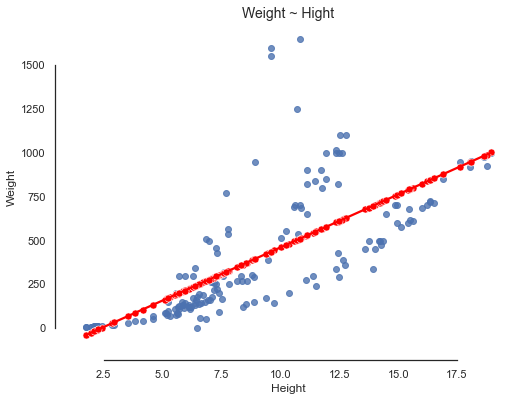

In [12]:
# - plotting the true data, predicted values and the prediction line
sns.regplot(data=model_frame, x='Height', y='Weight', ci=0, line_kws={'color':'red'})
sns.scatterplot(data=model_frame, x='Height', y='Predicted Values', color='red', s=50)
sns.despine(offset=10, trim=True)
plt.title('Weight ~ Hight', fontsize=14);

In [13]:
# - Pearson's correlation (R-value) coefficient and R^2
print(f"Pearson's correlation (R-value): {round(np.sqrt(linear_model.rsquared), 4)}")
print(f"Coefficient of determination (R^2): {round(linear_model.rsquared, 4)}")

Pearson's correlation (R-value): 0.7243
Coefficient of determination (R^2): 0.5247


In [14]:
# - p-values of the model's parameters
print(f"p-values: \n{linear_model.pvalues}")

p-values: 
Intercept    1.881076e-03
Height       3.842342e-27
dtype: float64


In [15]:
# --- Predicting new data

predictions = pd.DataFrame(columns=['Height', 'Weight'])


# - sampling the new data from the normal distribution with the mean and std parameters taken from the original data
new_fish_height = rng.normal(loc=model_frame['Height'].mean(), scale=model_frame['Height'].std(), size=100)
# - clipping the negative values 
new_fish_height = np.clip(new_fish_height, a_min=0, a_max=np.infty)
predictions['Height'] = new_fish_height

# - predicting the heights on the new data using the linear model
new_fish_weight = linear_model.predict(predictions['Height'])

# - displaying the new data and the corresponding predictions
predictions['Weight'] = new_fish_weight
print(predictions)

       Height      Weight
0   10.804985  509.276179
1   15.348863  784.164224
2    4.765494  143.908999
3    6.522283  250.188376
4   10.024896  462.083661
..        ...         ...
95   9.961327  458.237980
96   0.000000 -144.385971
97  15.671202  803.664547
98  10.254498  475.973755
99   7.387911  302.555713

[100 rows x 2 columns]


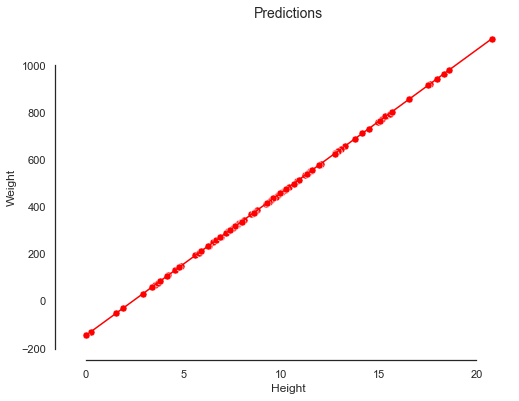

In [16]:
# - plotting the predictions
sns.lineplot(data=predictions, x='Height', y='Weight', color='red')
sns.scatterplot(data=predictions, x='Height', y='Weight', color='red', s=50)
sns.despine(offset=10, trim=True)
plt.title('Predictions', fontsize=14);

In [17]:
# R^2 upacked - calculating R^2 using the corresponding formulas
total_sse = np.sum((model_frame['Weight'] - model_frame['Weight'].mean())**2)
model_sse = np.sum((model_frame['Predicted Values'] - model_frame['Weight'].mean())**2)
residual_sse = np.sum(model_frame['Residuals']**2)

print(np.isclose(total_sse, model_sse + residual_sse))

True


In [18]:
# - calculating R^2 from the correlation 
r2 = model_frame['Height'].corr(model_frame['Weight'])**2
print(f"r2 = {r2}\n")

# - or 
corr_matrix = np.corrcoef(model_frame['Height'], model_frame['Weight'])**2
print(corr_matrix, '\n')
r2 = corr_matrix[0, 1]
print(f"r2 = {r2}")

r2 = 0.5246761559328881

[[1.         0.52467616]
 [0.52467616 1.        ]] 

r2 = 0.5246761559328881


In [19]:
# - yet another way to calculate R^2
model_sse/total_sse

0.5246761559328881

In [20]:
# - correlation is the covariance of the scaled variables!

# - scaling the variables
x = (model_frame['Height'] - model_frame['Height'].mean())/model_frame['Height'].std()
y = (model_frame['Weight'] - model_frame['Weight'].mean())/model_frame['Weight'].std()

# - calculating the covariance
cov_matrix = np.cov(x, y)
cov = cov_matrix[0, 1]
print('cov.: ', cov)
print('R^2 = cov.^2: ', cov**2)

cov.:  0.7243453291993318
R^2 = cov.^2:  0.5246761559328884


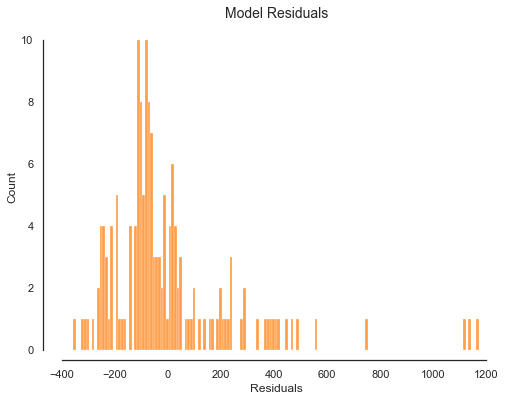

In [21]:
# - plotting the distribution of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(data=model_frame, x='Residuals', binwidth=10, color='tab:orange')
sns.despine(offset=10, trim=True)
plt.title('Model Residuals', fontsize=14);

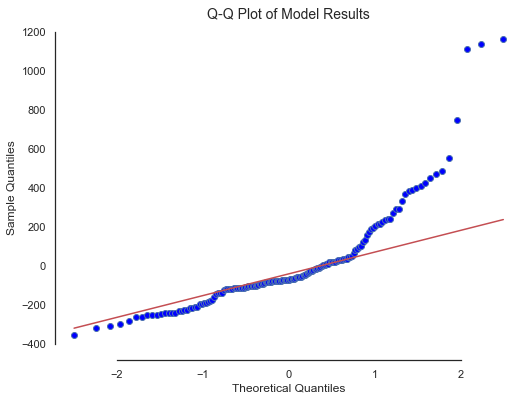

In [22]:
# - plotting the qqplot
sm.qqplot(model_frame['Residuals'].values, line='q')
sns.despine(offset=10, trim=True)
plt.title('Q-Q Plot of Model Results', fontsize=14);

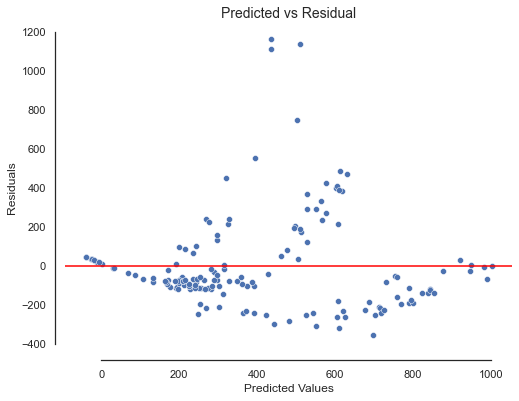

In [23]:
### --- Heteroskedacity

# - plotting the predicted values vs the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(data=model_frame, x='Predicted Values', y='Residuals')
sns.despine(offset=10, trim=True)
plt.axhline(y=0, color='red')
plt.title('Predicted vs Residual', fontsize=14);

In [24]:
# - identifying the influental cases
model_inf = linear_model.get_influence()
inf_frame = model_inf.summary_frame()
inf_frame

,dfb_Intercept,dfb_Height,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.010916,-0.059963,0.006823,-1.259609,0.008528,-0.116819,-1.261984,-0.117039
1,0.032398,-0.085427,0.009019,-1.301798,0.010531,-0.134302,-1.304707,-0.134602
2,0.024818,-0.068269,0.005990,-1.073542,0.010288,-0.109452,-1.074067,-0.109506
3,0.031016,-0.074907,0.006424,-1.067137,0.011157,-0.113353,-1.067612,-0.113404
4,0.017523,-0.046875,0.002770,-0.724468,0.010445,-0.074430,-0.723367,-0.074317
...,...,...,...,...,...,...,...,...
154,0.018540,-0.015848,0.000175,0.123070,0.022599,0.018714,0.122683,0.018655
155,0.006371,-0.005382,0.000021,0.044004,0.021029,0.006449,0.043864,0.006429
156,0.011339,-0.009632,0.000066,0.076917,0.021726,0.011463,0.076673,0.011426
157,-0.005431,0.004510,0.000015,-0.039590,0.019101,-0.005525,-0.039464,-0.005507


In [25]:
### --- Influence Measures

# - calculating the Cook's distance /Cook and Weisberg (1982)/
# - consider values with Cook's distance greater than 1 to be problematic

w_cookD = np.argwhere(model_inf.cooks_distance[0] > 1)
w_cookD

array([], shape=(0, 1), dtype=int64)

In [26]:
# - Leverage: hat values
# - Average Leverage = (k+1)/n
# - k - num. of predictors
# - n - num. observations
# - Also termed: hat values, range: 0 - 1
# - Various criteria (twice the average leverage, three times the average leverage...)

k = 1
n = len(model_frame)
w_leverage = np.argwhere(model_inf.hat_matrix_diag > 2*(k+1)/n)
w_leverage

array([[27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34]], dtype=int64)

In [27]:
# - influence plot
inf_plot_frame = pd.DataFrame(columns=['Residuals', 'Leverage', 'Cook Dist.'])

inf_plot_frame['Residuals'] = model_frame['Residuals']
inf_plot_frame['Leverage'] = model_inf.hat_matrix_diag
inf_plot_frame['Cook Dist.'] = model_inf.cooks_distance[0]

inf_plot_frame

,Residuals,Leverage,Cook Dist.
0,-310.531995,0.008528,0.006823
1,-320.608492,0.010531,0.009019
2,-264.425765,0.010288,0.005990
3,-262.732580,0.011157,0.006424
4,-178.430623,0.010445,0.002770
...,...,...,...
154,30.124399,0.022599,0.000175
155,10.779838,0.021029,0.000021
156,18.835779,0.021726,0.000066
157,-9.707947,0.019101,0.000015


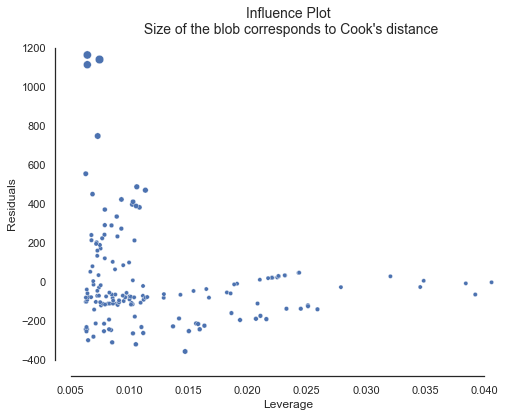

In [28]:
# - plotting the influence plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=inf_plot_frame, x='Leverage', y='Residuals', size='Cook Dist.', legend=None)
sns.despine(offset=10, trim=True)
plt.title("Influence Plot\n Size of the blob corresponds to Cook's distance", fontsize=14);

## Linear Regression using scikit-learn

In [29]:
# - import scikit-learn
from sklearn.linear_model import LinearRegression

In [30]:
# - fitting the linear model to the data
X = model_frame['Height'].values.reshape(-1, 1)
y = model_frame['Weight'].values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [31]:
# - coefficents of the model
lin_reg.coef_, lin_reg.intercept_

(array([[60.49635121]]), array([-144.38597115]))

In [32]:
# - calculating R^2 
lin_reg.score(X, y)

0.5246761559328882

In [33]:
# - predicting the weight using the model
X_pred = predictions['Height'].values.reshape(-1, 1)
y_pred = lin_reg.predict(X_pred)
y_pred[:10]

array([[509.27617897],
       [784.16422374],
       [143.9089987 ],
       [250.18837614],
       [462.0836611 ],
       [535.95336025],
       [273.92477427],
       [921.70690843],
       [132.07483005],
       [430.25967871]])

In [34]:
# - comparing with the predictions from scipy's model
predictions['Weight']

0     509.276179
1     784.164224
2     143.908999
3     250.188376
4     462.083661
         ...    
95    458.237980
96   -144.385971
97    803.664547
98    475.973755
99    302.555713
Name: Weight, Length: 100, dtype: float64

## 2. Parametric Bootstrap

### Enter the Sim-Fit Loop

### Bias and Variance via the Bootstrap

## 3. Partial and Part Correlation

### Further Reading

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>